# Task 4: Explore Decision Tree Algorithm

## Objective

###### Creating Decision Tree classifier and visualizing graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import statistics as st
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
# Load the iris dataset
iris=pd.read_csv("C:\SamFiles\INTERNASHALA TRAINING\SPARKS Foundation\Task 4\Iris.csv")
print("DATA LOADED SUCCESFULLY")

DATA LOADED SUCCESFULLY


In [4]:
#Printing the first 10 rows
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
print(iris.info())
print(iris.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000    

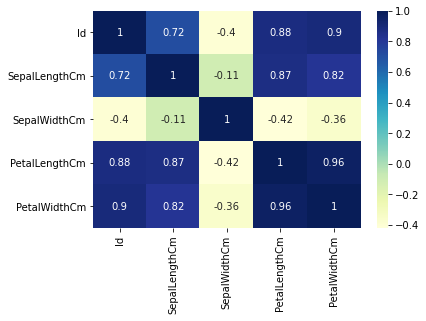

In [16]:
corr= iris.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='YlGnBu',annot=True)
plt.show()

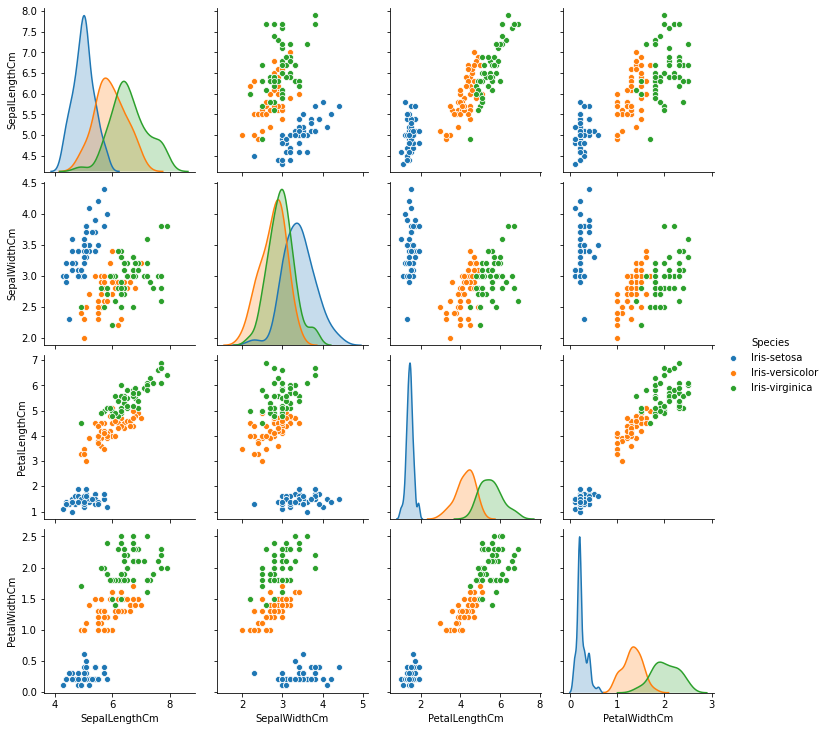

In [17]:
sns.pairplot(iris.iloc[:,[1,2,3,4,5]],hue='Species')

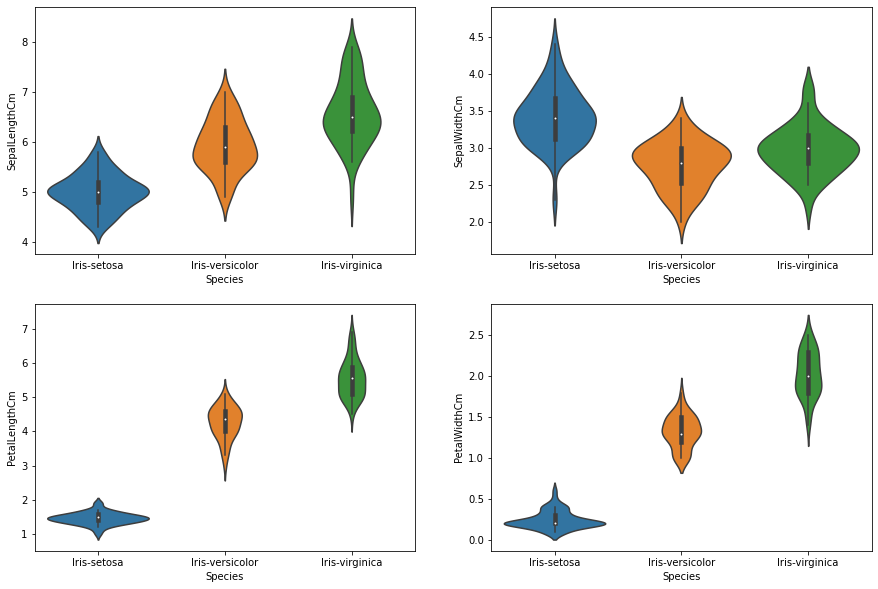

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm', data=iris)
plt.show()

### Preparing the data

In [32]:
## Splitting dataset into train and validation sets

X, y = iris.iloc[ : , 1: -1], iris.iloc[ : , -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0, shuffle = True, test_size = 0.2)
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


### Constructing the Decision Tree

In [33]:
treeModel = DecisionTreeClassifier(max_depth = 6)   
treeModel.fit(X_train, y_train)
y_preds = treeModel.predict(X_val)

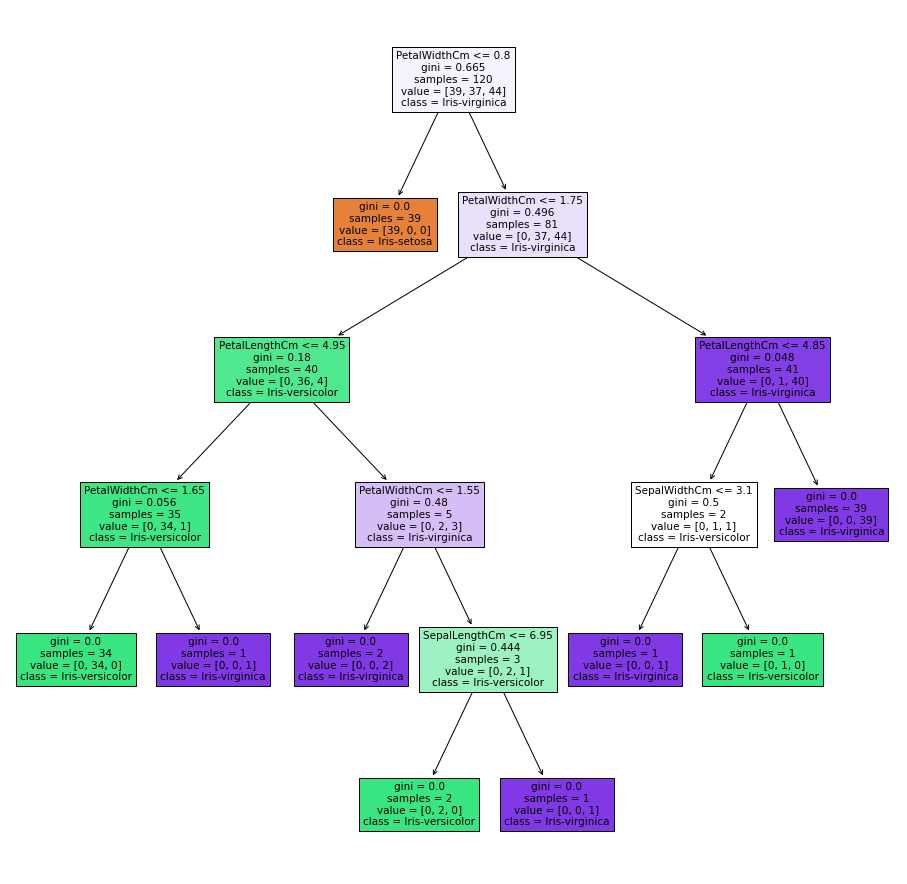

In [38]:
#Visualizing the Decision Tree
plt.figure(figsize = (16, 16))
plot_tree(treeModel,
         feature_names=X.columns,
         class_names=y.unique(),
         filled = True);

In [35]:
#Predicting accuracy
print(classification_report(y_val, y_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



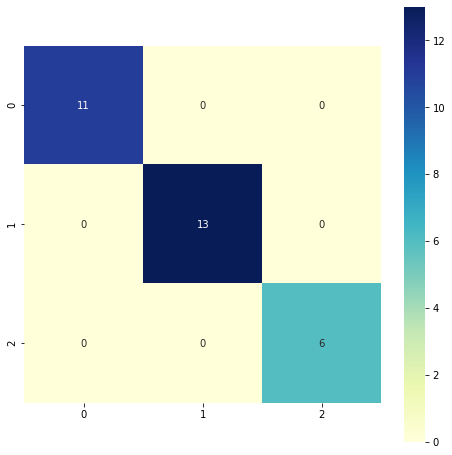

In [36]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_val, y_preds), annot = True, square = True, cmap='YlGnBu');